In [2]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
dataset = randn(25)

(0, 1)

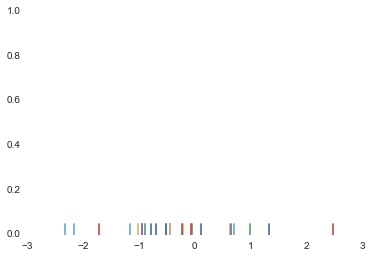

In [3]:
sns.rugplot(dataset)

plt.ylim(0,1)

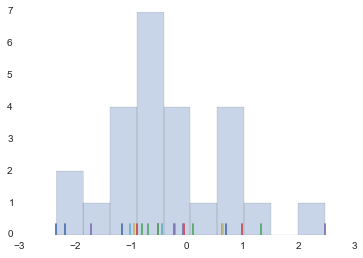

In [4]:
plt.hist(dataset,alpha = 0.3)
sns.rugplot(dataset)



The histogram sets up 10 bins and then just count how many ticks appeared in each bin, setting the height of each bar

The kernel density plot will represent each tick mark with a gaussian basis function. Let's see how we would do this manually


(0, 1)

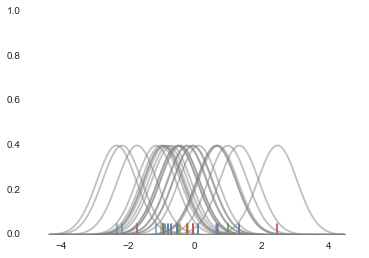

In [5]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

kernal_list = []

for data_point in dataset:
    
    # Create a kernal for each data point and append it to the kernal_list
    kernal = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernal_list.append(kernal)
    
    # Scale for plotting
    kernal = kernal / kernal.max()
    kernal = kernal * 0.4
    
    plt.plot(x_axis,kernal, color = 'grey', alpha = 0.5)
    
    
plt.ylim(0,1)  

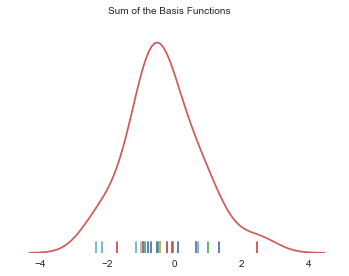

In [6]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernal_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset)

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

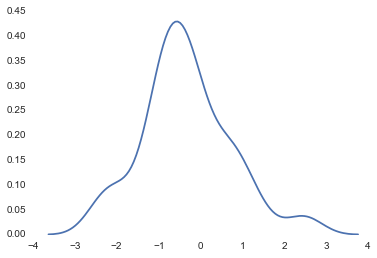

In [7]:
sns.kdeplot(dataset)

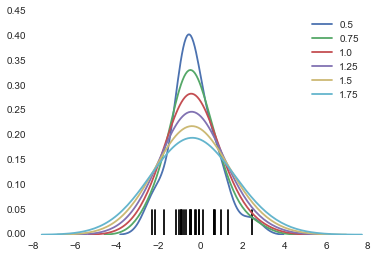

In [8]:
sns.rugplot(dataset, color = 'black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

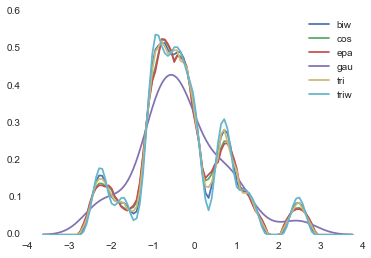

In [14]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern,label=kern)

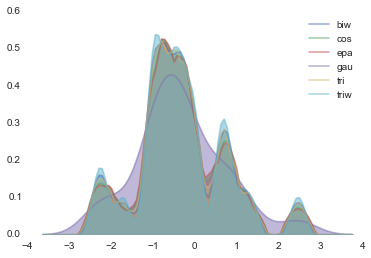

In [15]:
# We can also shade if desired
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True,alpha=0.5)

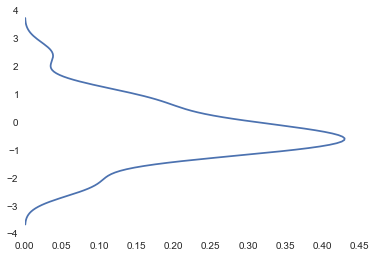

In [16]:
# For vertical axis, use the vertical keyword
sns.kdeplot(dataset,vertical=True)

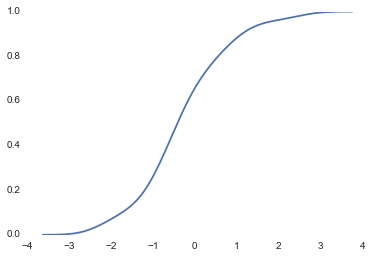

In [17]:
# Finally we can also use kde plot to create a cumulative distribution function (CDF) of the data

# URL for info on CDF
url = 'http://en.wikipedia.org/wiki/Cumulative_distribution_function'

sns.kdeplot(dataset,cumulative=True)

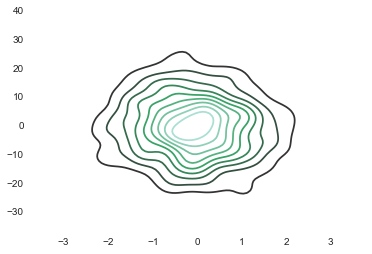

In [19]:
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean,cov,1000)

dframe = pd.DataFrame(dataset2,columns = ['X','Y'])

sns.kdeplot(dframe)                                

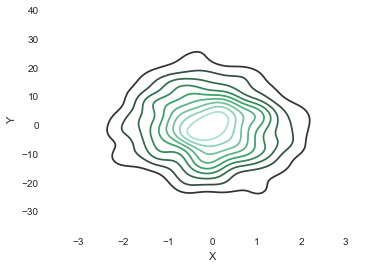

In [20]:
sns.kdeplot(dframe.X,dframe.Y)

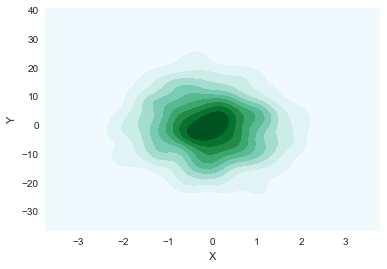

In [21]:
# Can specify a particualr bandwidth
sns.kdeplot(dframe.X,dframe.Y, shade = True)

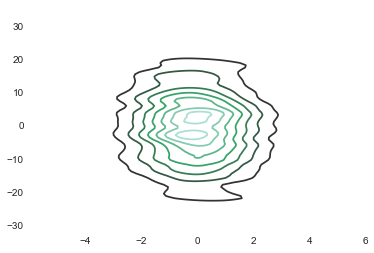

In [22]:
sns.kdeplot(dframe, bw = 1)

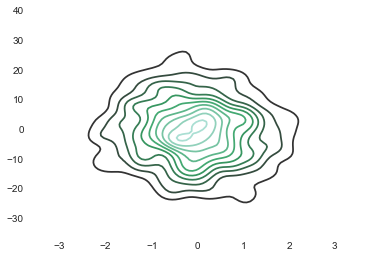

In [23]:
# Or just use silverman again

sns.kdeplot(dframe, bw='silverman')

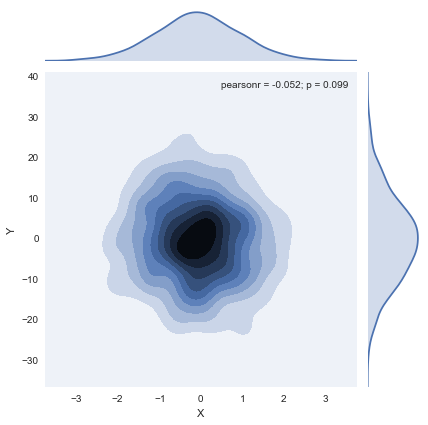

In [24]:
# We can also create a kde joint plot, simliar to the hexbin plots we saw before

sns.jointplot('X','Y',dframe,kind='kde')